In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Step :1 read date column as date time datatype

In [17]:
df=pd.read_csv('synthetic_sales_data_with_seasonal_trends.csv',parse_dates=['Date'])

In [18]:
df.info() # date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        168 non-null    datetime64[ns]
 1   Meat        168 non-null    int64         
 2   Seafood     168 non-null    int64         
 3   Dairy       168 non-null    int64         
 4   Eggs        168 non-null    int64         
 5   Fruits      168 non-null    int64         
 6   Vegetables  168 non-null    int64         
 7   Frozen      168 non-null    int64         
 8   Canned      168 non-null    int64         
 9   Dry         168 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 13.3 KB


In [19]:
df.head() 

,Date,Meat,Seafood,Dairy,Eggs,Fruits,Vegetables,Frozen,Canned,Dry
0,2010-01-31,36,51,45,33,44,31,48,44,30
1,2010-02-28,36,39,44,38,56,34,54,46,31
2,2010-03-31,39,46,51,31,51,40,48,49,35
3,2010-04-30,39,49,40,30,43,35,56,45,38
4,2010-05-31,36,47,42,36,54,27,33,41,38


# Step :2 No missing value

In [20]:
df.isnull().sum()

Date          0
Meat          0
Seafood       0
Dairy         0
Eggs          0
Fruits        0
Vegetables    0
Frozen        0
Canned        0
Dry           0
dtype: int64

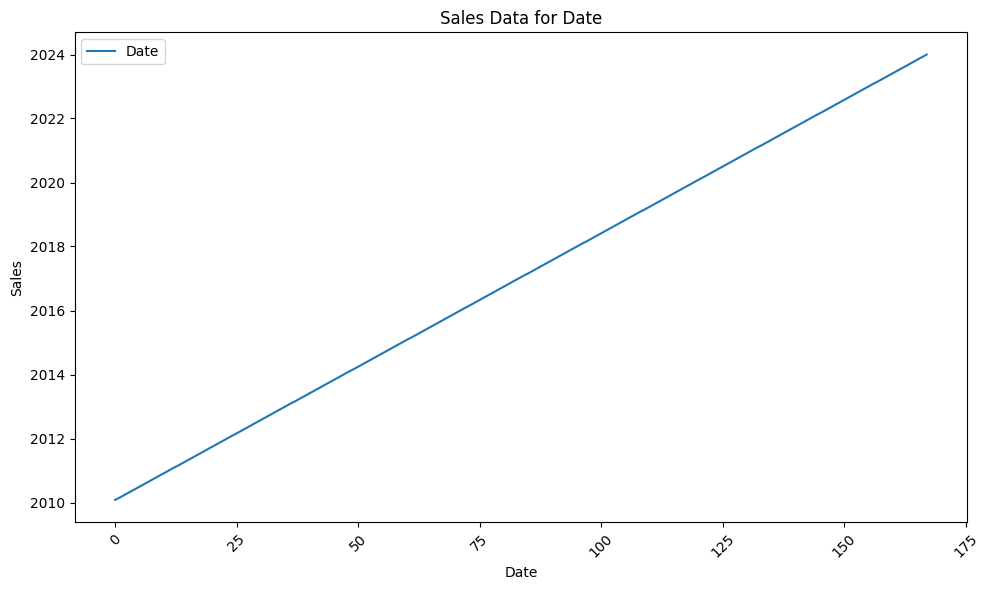

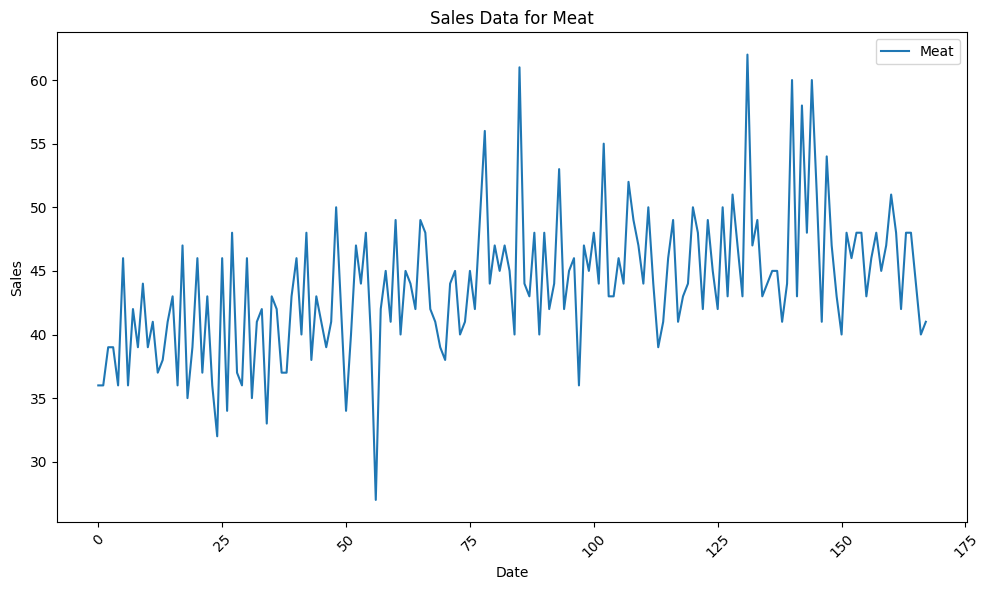

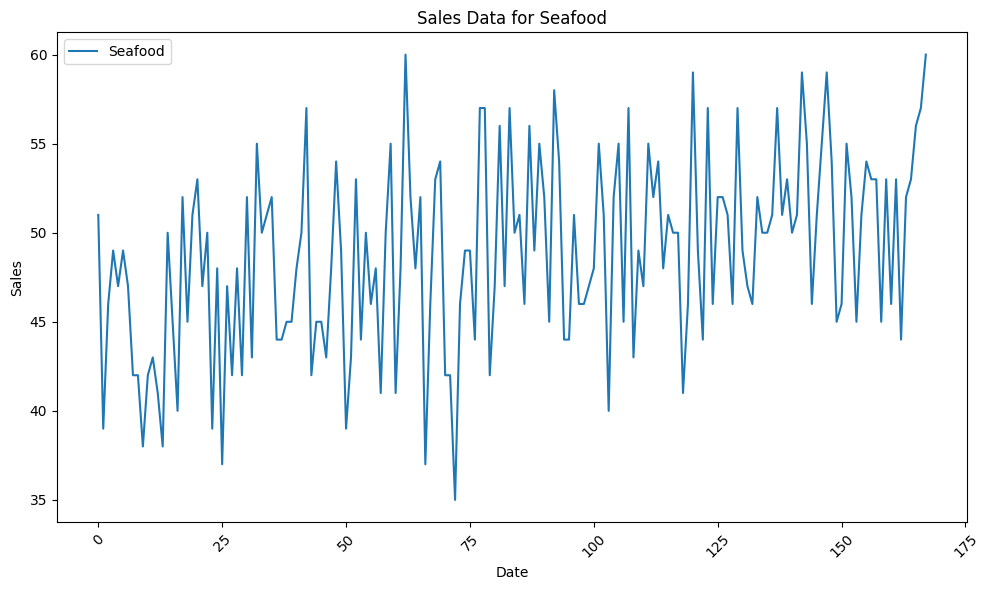

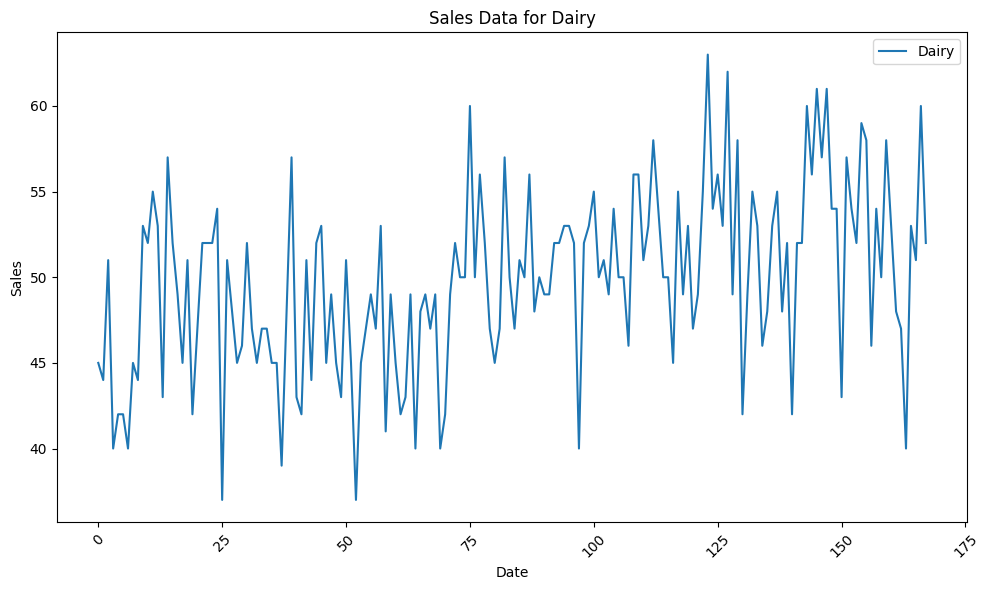

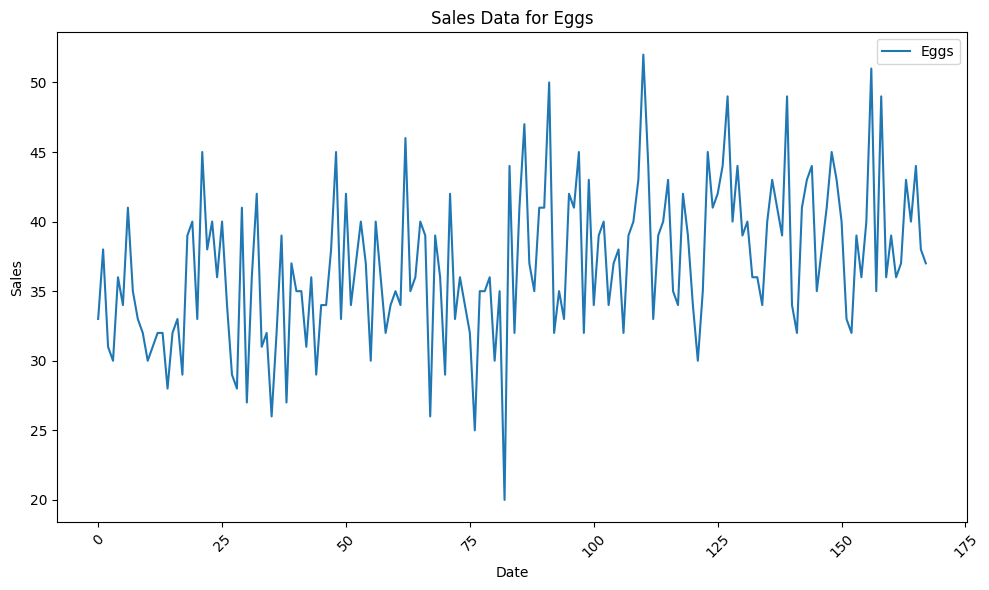

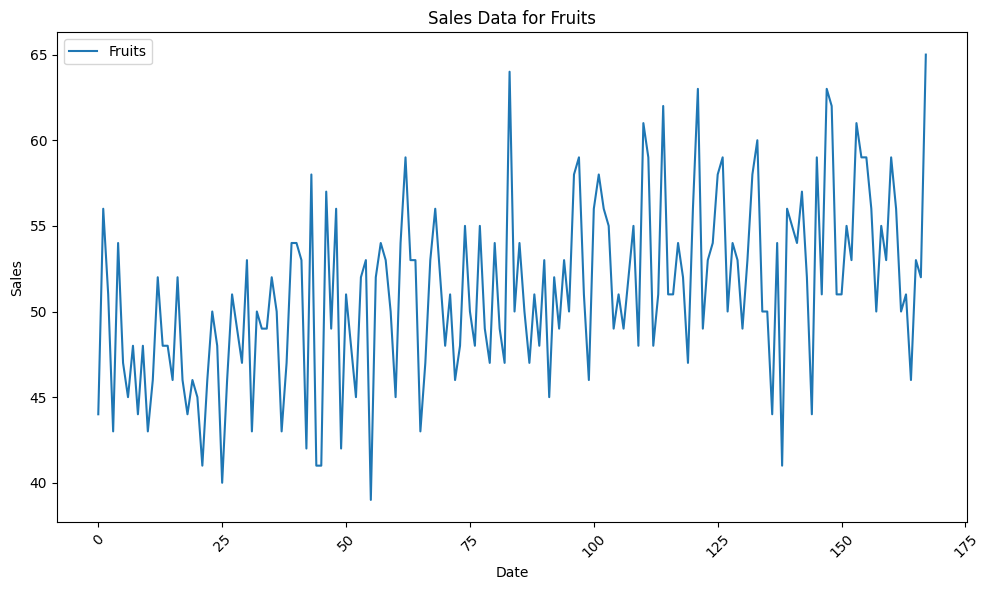

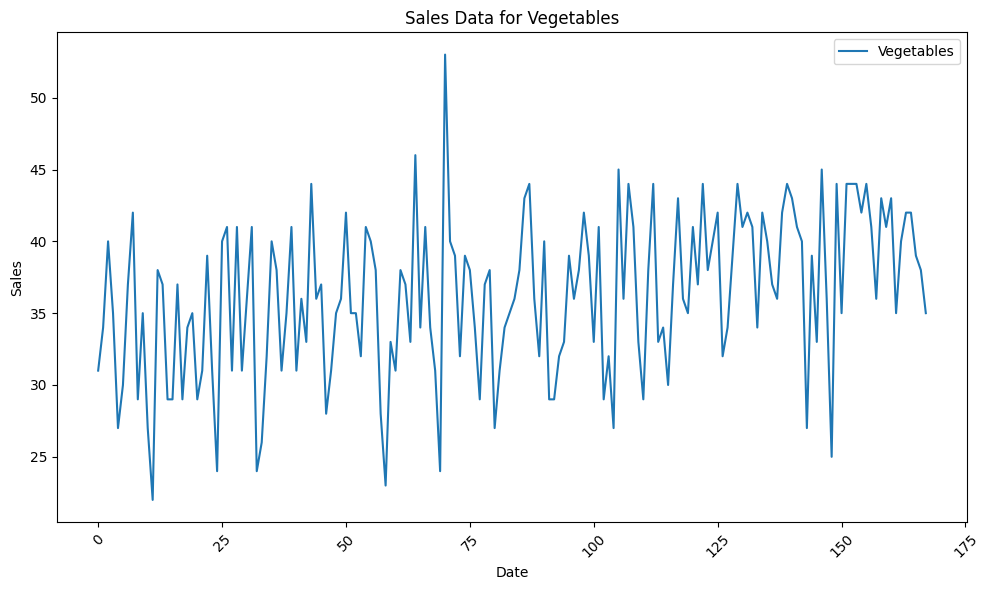

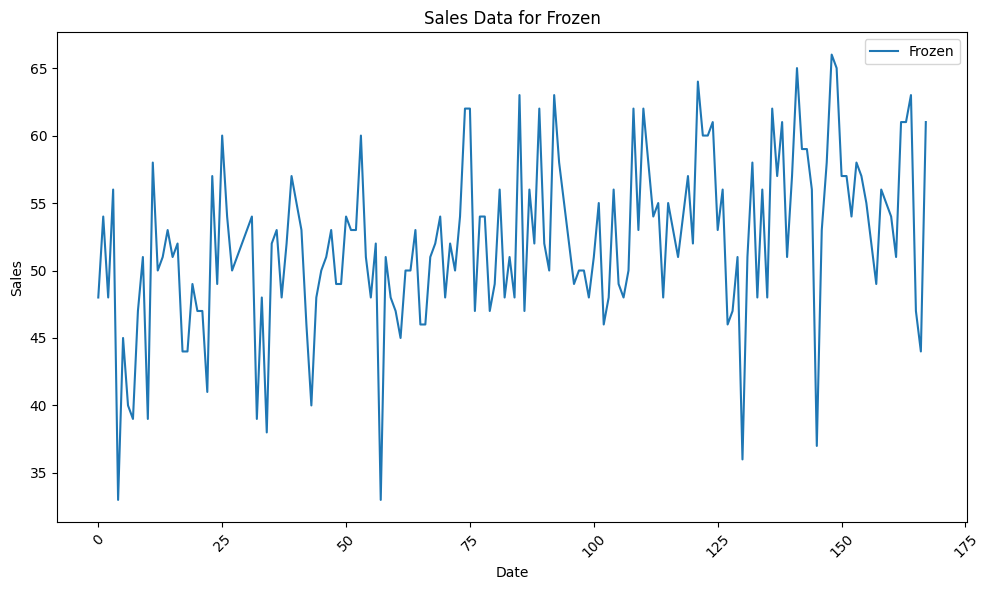

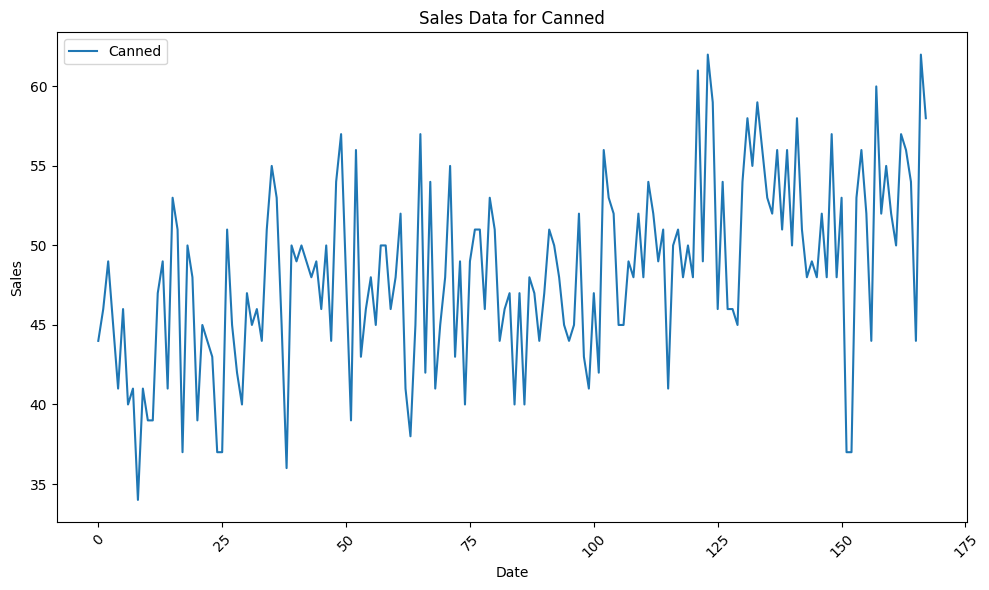

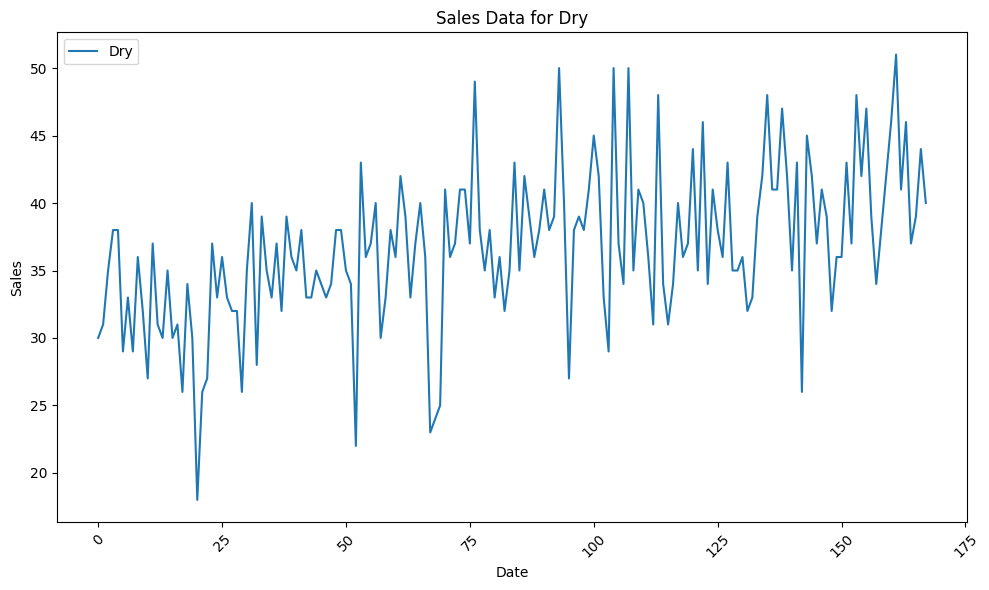

In [21]:
for category in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[category], label=category)
    plt.title(f'Sales Data for {category}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()


In [22]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x600 with 0 Axes>

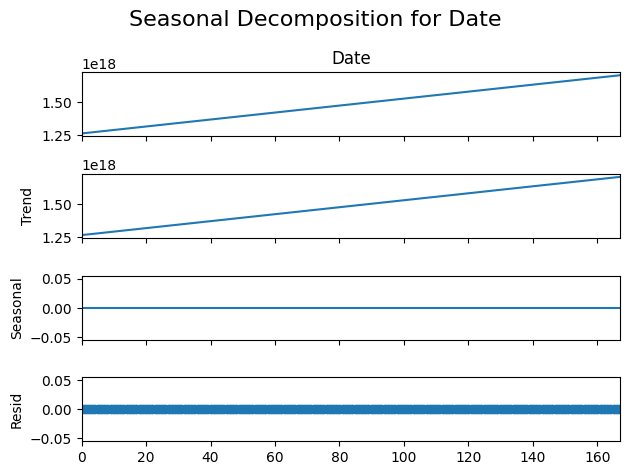

<Figure size 1000x600 with 0 Axes>

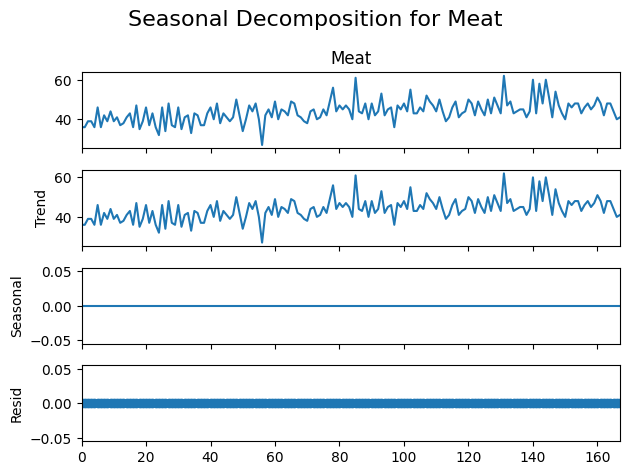

<Figure size 1000x600 with 0 Axes>

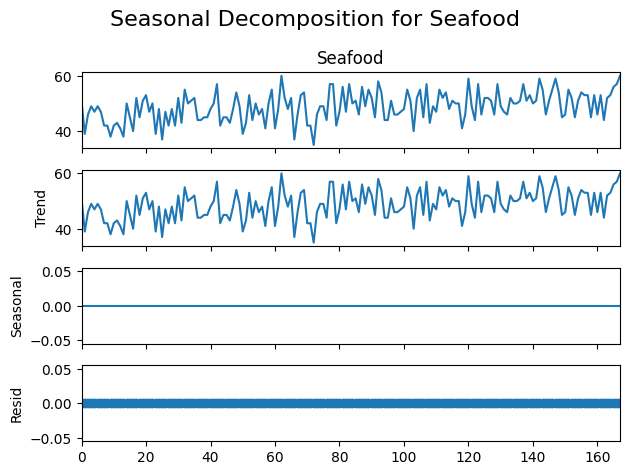

<Figure size 1000x600 with 0 Axes>

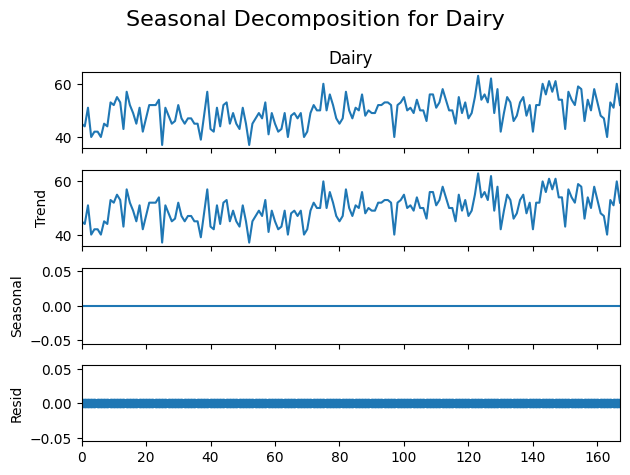

<Figure size 1000x600 with 0 Axes>

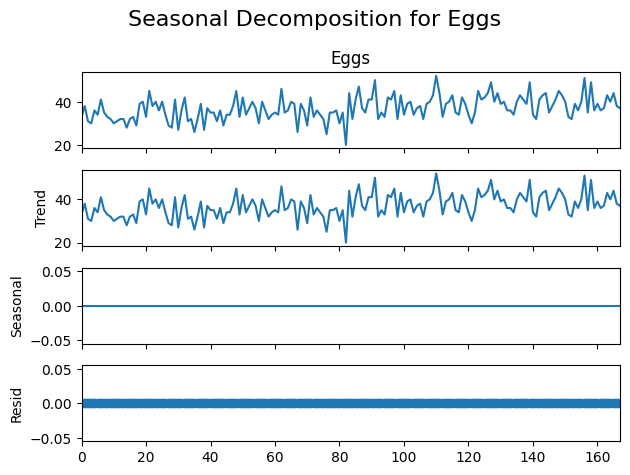

<Figure size 1000x600 with 0 Axes>

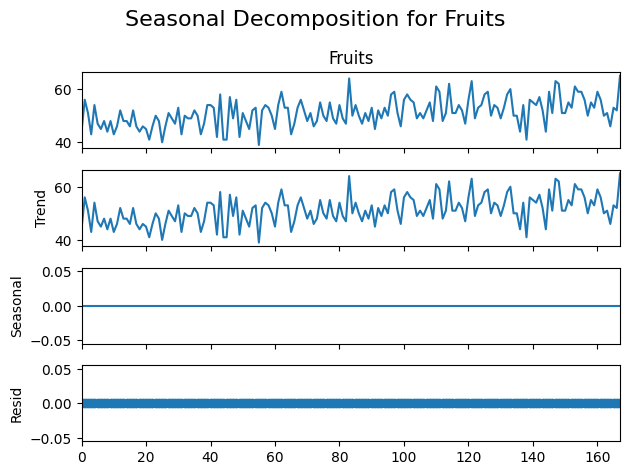

<Figure size 1000x600 with 0 Axes>

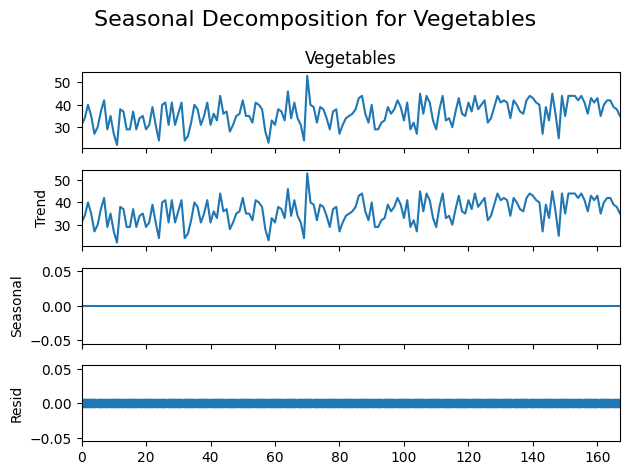

<Figure size 1000x600 with 0 Axes>

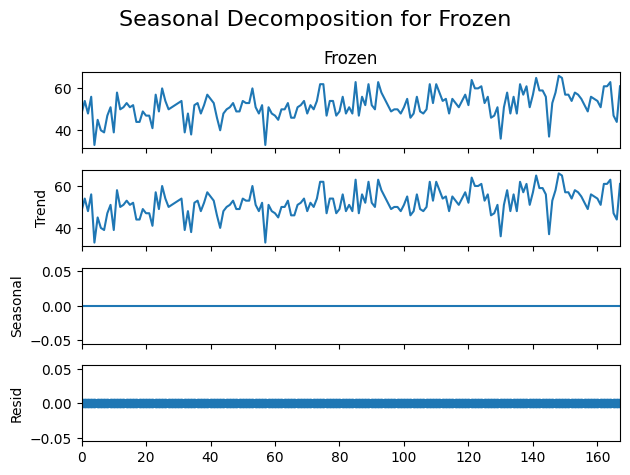

<Figure size 1000x600 with 0 Axes>

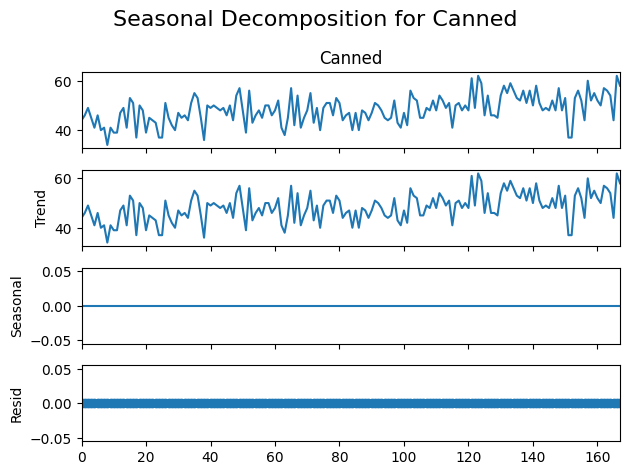

<Figure size 1000x600 with 0 Axes>

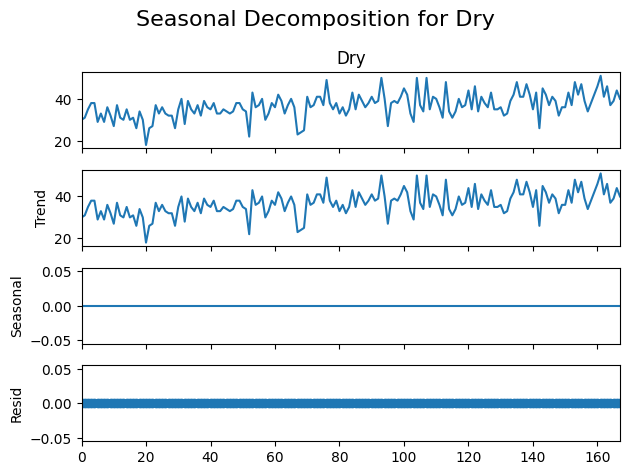

In [23]:
for category in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Perform seasonal decomposition
    # decomposition = seasonal_decompose(df[category], model='additive', period=seasonal_period)
    seasonal_decompose(df[category],model='additive',period=1).plot()
    # Plot the decomposed components
    # decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition for {category}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Step 4: Train test Split

In [24]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [25]:
train.tail()

,Date,Meat,Seafood,Dairy,Eggs,Fruits,Vegetables,Frozen,Canned,Dry
129,2020-10-31,47,57,58,44,53,44,51,45,35
130,2020-11-30,43,49,42,39,49,41,36,54,36
131,2020-12-31,62,47,49,40,53,42,51,58,32
132,2021-01-31,47,46,55,36,58,41,58,55,33
133,2021-02-28,49,52,53,36,60,34,48,59,39


In [26]:
test

,Date,Meat,Seafood,Dairy,Eggs,Fruits,Vegetables,Frozen,Canned,Dry
134,2021-03-31,43,50,46,34,50,42,56,56,42
135,2021-04-30,44,50,48,40,50,40,48,53,48
136,2021-05-31,45,51,53,43,44,37,62,52,41
137,2021-06-30,45,57,55,41,54,36,57,56,41
138,2021-07-31,41,51,48,39,41,42,61,51,47
139,2021-08-31,44,53,52,49,56,44,51,56,42
140,2021-09-30,60,50,42,34,55,43,57,50,35
141,2021-10-31,43,51,52,32,54,41,65,58,43
142,2021-11-30,58,59,52,41,57,40,59,51,26
143,2021-12-31,48,55,60,43,52,27,59,48,45


# Step 5: Holt Winters Model

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [99]:
hwmodel=ExponentialSmoothing(train.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [100]:
test_pred=hwmodel.forecast(5)

In [101]:
test_pred

2019-08-01    6566.980946
2019-09-01    4813.590514
2019-10-01    4705.545555
2019-11-01    7013.696342
2019-12-01    5890.251498
Freq: MS, dtype: float64

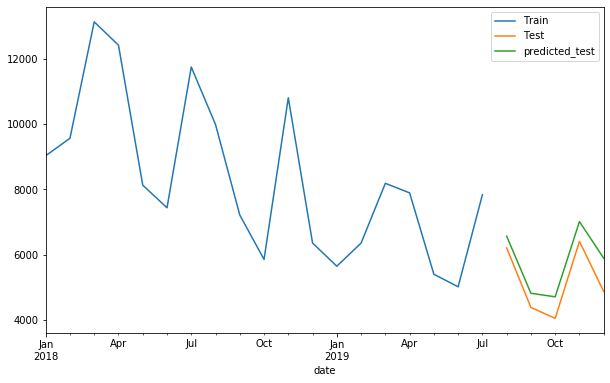

In [105]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

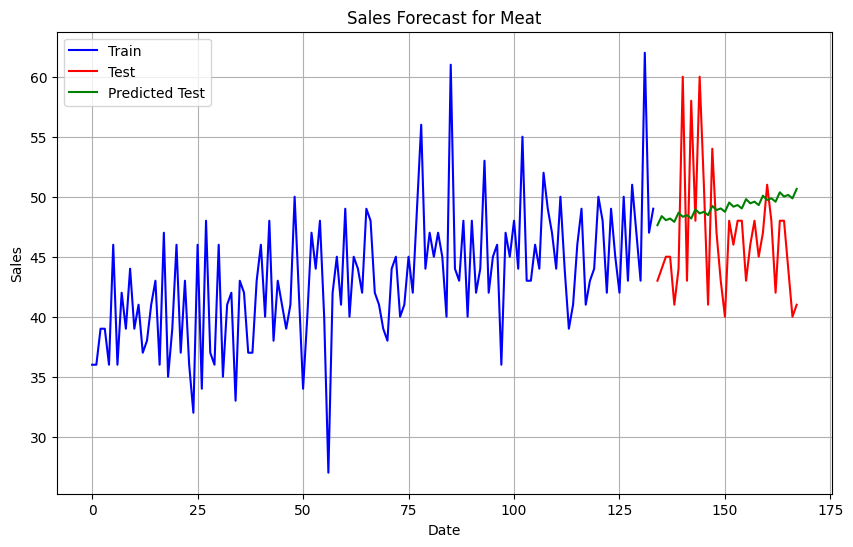

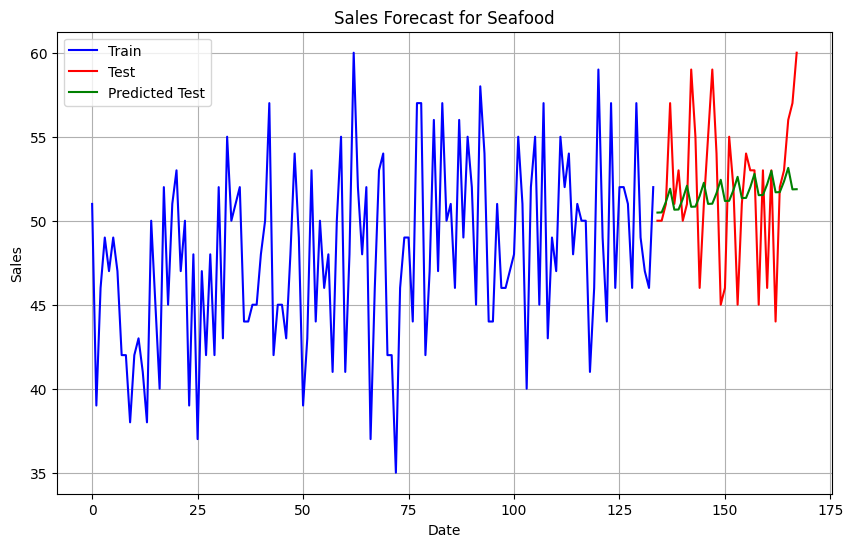

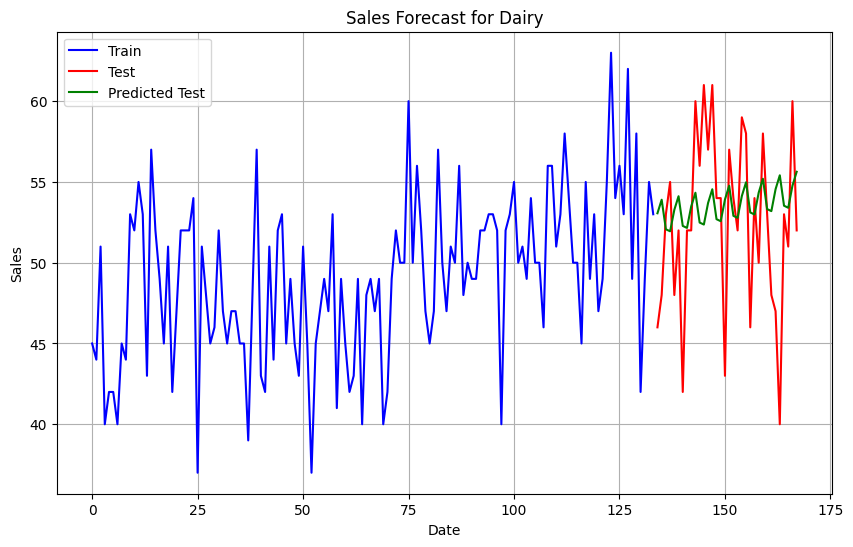

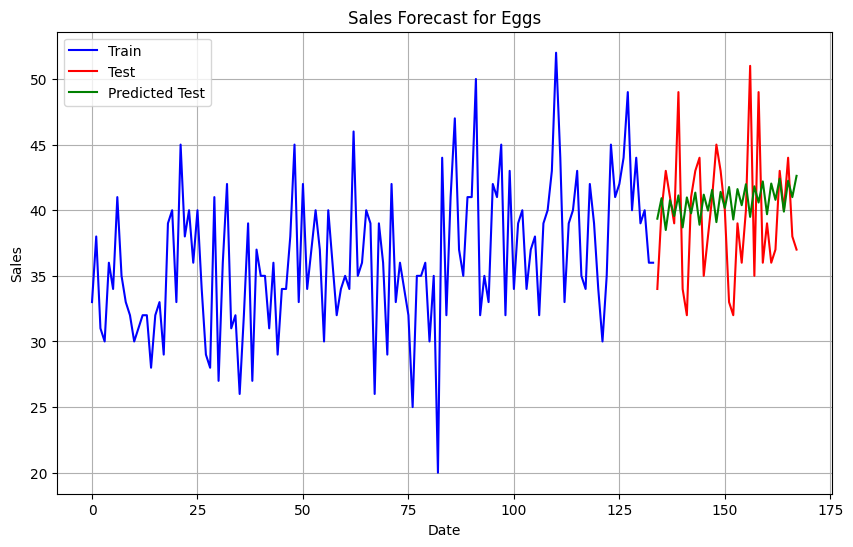

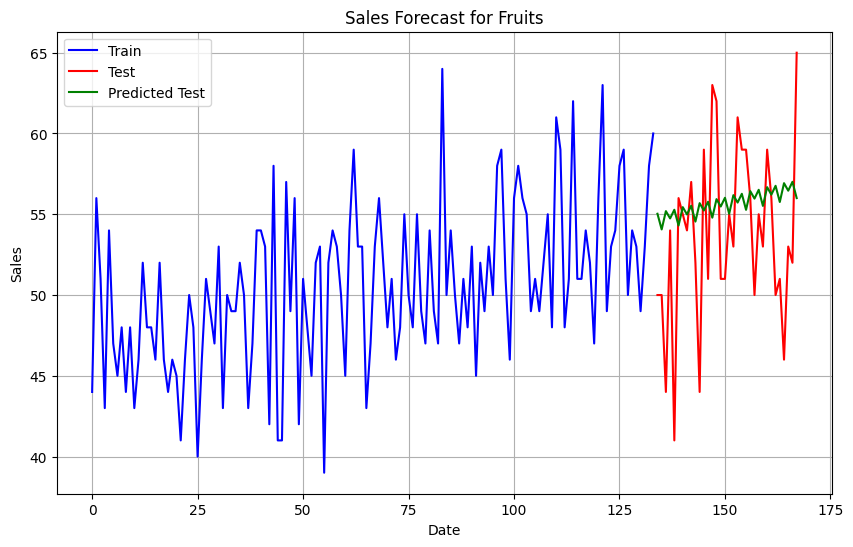

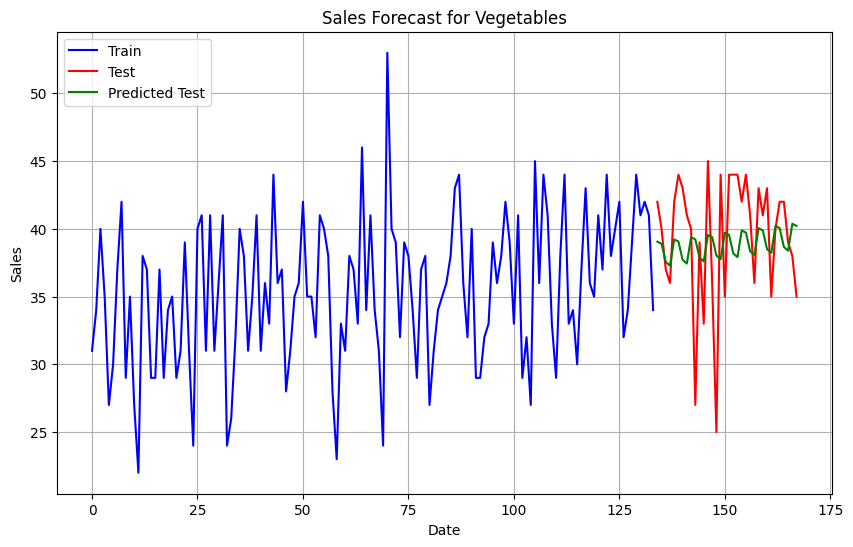

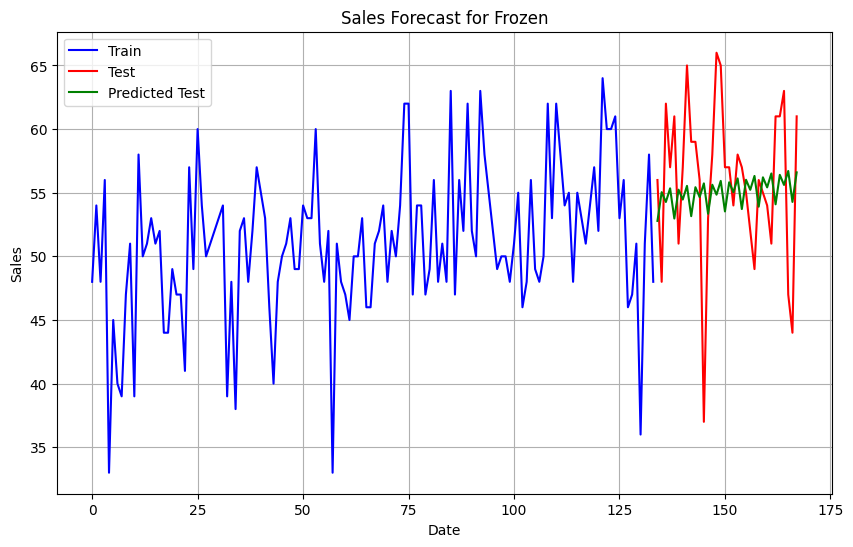

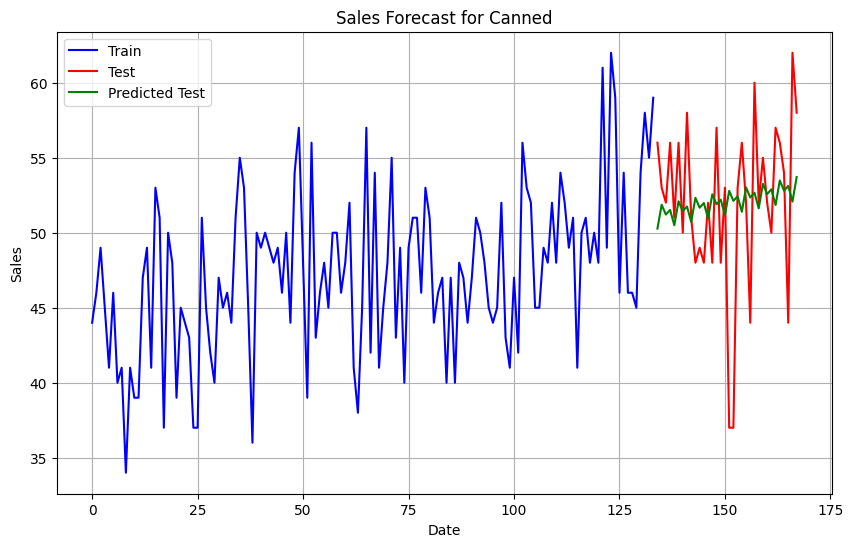

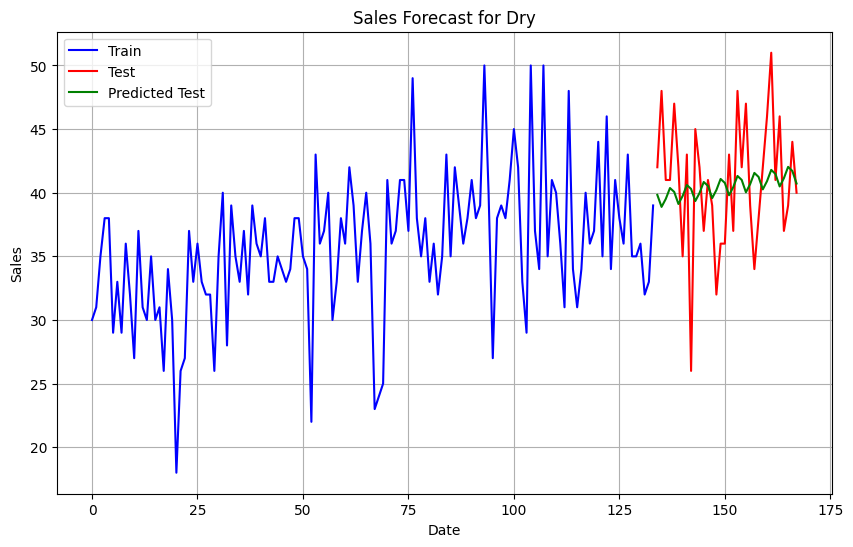

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'df' is your DataFrame with sales data for multiple categories
categories = ['Meat', 'Seafood', 'Dairy', 'Eggs', 'Fruits', 'Vegetables', 'Frozen', 'Canned', 'Dry']

# Function to fit the Holt-Winters model for each category and make predictions
def predict_sales(df, category, train_size=0.8, seasonal_periods=4):
    # Split the data into train and test
    n_train = int(len(df) * train_size)
    train = df[:n_train]
    test = df[n_train:]

    # Fit the Holt-Winters model
    hwmodel = ExponentialSmoothing(train[category], trend='add', seasonal='mul', seasonal_periods=seasonal_periods).fit()

    # Forecast the next 5 data points
    test_pred = hwmodel.forecast(len(test))

    # Plot the results
    plt.figure(figsize=(10, 6))
    train[category].plot(legend=True, label='Train', color='blue')
    test[category].plot(legend=True, label='Test', color='red')
    test_pred.plot(legend=True, label='Predicted Test', color='green')
    plt.title(f'Sales Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Iterate over each category and apply the prediction function
for category in categories:
    predict_sales(df, category)


# Step: 6. Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
np.sqrt(mean_squared_error(test,test_pred))

NameError: name 'test_pred' is not defined

In [109]:
df.sales.mean(), np.sqrt(df.sales.var())

(7665.204166666666, 2549.757117414906)

# Step: 7. Final Model

In [110]:
final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [111]:
pred=final_model.forecast(4)

In [112]:
pred

2020-01-01    3501.809547
2020-02-01    3250.705899
2020-03-01    4648.046670
2020-04-01    3702.422999
Freq: MS, dtype: float64

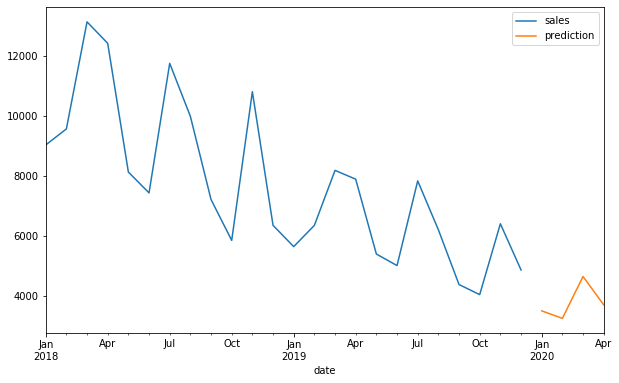

In [113]:
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')